## Homework 6 (Elchin Gurbanli)

### Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### a) Perform an Exploratory Data Analysis (“EDA”) on the dataset (using the columns you’ve chosen), including visualization and descriptive statistics.Interpret the results and describe them in your own words.

In [40]:
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
df.shape

(1460, 81)

Our dataframe consists of 81 columns (features) and 1460 rows (records). The first column - ID - will be useless in training phase, so it will be dropped

In [43]:
df.drop("Id", axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now I am going to examine our target variable which is SalePrice column - the property's sale price in dollars

Skewness: 1.882876


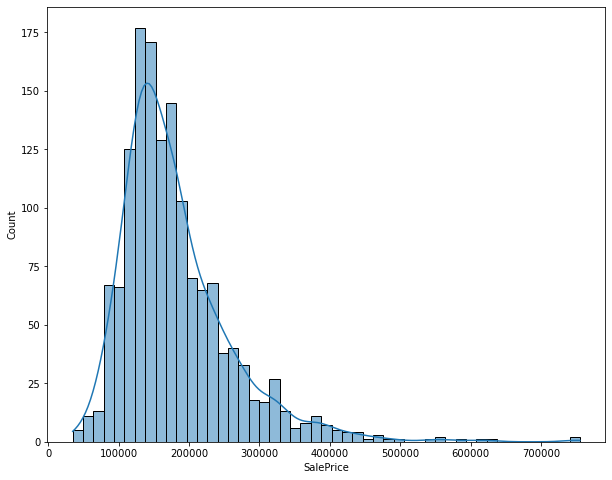

In [44]:
plt.figure(figsize=(10, 8))
# sns.set(rc={'figure.figsize':(15,12)})
sns.histplot(df['SalePrice'], kde=True)
print("Skewness: %f" % df['SalePrice'].skew())

In [45]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From here it can be seen that our distribution on right-skewed and is not normal
This can reduce the performance of the ML regression models because some assume normal distribution
Therfore we make a log transformation, the resulting distribution looks much better.

As seen in the description of the column, the mean is greater that median as in right-skewed distribution

Skewness: 0.121335


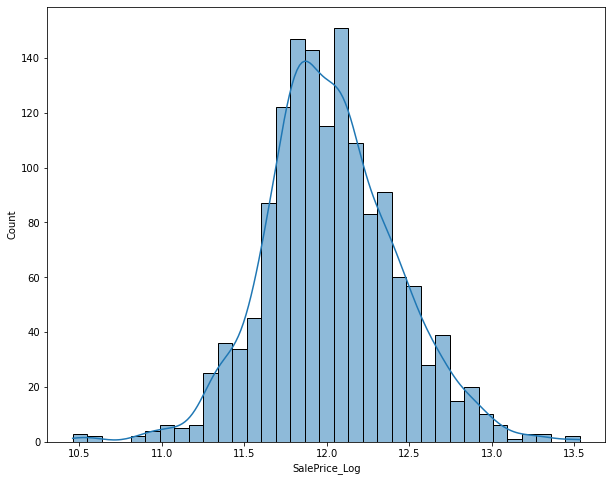

In [46]:
df['SalePrice_Log'] = np.log(df['SalePrice'])

plt.figure(figsize=(10, 8))
sns.histplot(df['SalePrice_Log'], kde = True)
# Skewness
print("Skewness: %f" % df['SalePrice_Log'].skew())

In [47]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


#### We can observe 3 numerical and 43 pbject types

In [48]:
numeric_features = df.select_dtypes(include=['number'])
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SalePrice_Log'],
      dtype='object')

In [49]:
numeric_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,12.429216


In [50]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [51]:
categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Missing values

In [52]:
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_vals = df.isnull().sum().sort_values(ascending=False)
missing = pd.concat([missing_vals, percent], axis = 1, keys = ['Total', 'Percent'])
missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageCond,81,0.055479


##### Filling missing values
For a few columns there is lots of NaN entries. In PoolQC - almost as much as there is data.
However, reading the data description we find this is not missing data:
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, MiscFeature etc

In [53]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 
                'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
                'MasVnrType', 'Electrical']

# replace 'NaN' with 'None' in these columns
for cols in cols_fillna:
    df[cols].fillna('None', inplace=True)

From above table table with missing values, LotFrontage(Linear feet of street connected to property), GarageYrBlt(Year garage was built), and MasVnrArea(Masonry veneer area in square feet) were excluded to be filled because these are real missing values, i.d, there has to be a linear foot of street, year in which garage was built, and masonry area

In [54]:
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_vals = df.isnull().sum().sort_values(ascending=False)
missing = pd.concat([missing_vals, percent], axis = 1, keys = ['Total', 'Percent'])
missing.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
MSSubClass,0,0.000000
KitchenQual,0,0.000000


In [55]:
df.isnull().sum().sum()

348

348 missing values in training data

#### Filling NA with the mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea

In [56]:
df.fillna(df.mean(), inplace=True)
df.fillna(df.mean(), inplace=True)

In [57]:
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_vals = df.isnull().sum().sort_values(ascending=False)
missing = pd.concat([missing_vals, percent], axis = 1, keys = ['Total', 'Percent'])
missing.head()

,Total,Percent
MSSubClass,0,0.0
Electrical,0,0.0
GarageFinish,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0


No missing values

#### Plotting the correlation heatmap of numeric features

<AxesSubplot:>

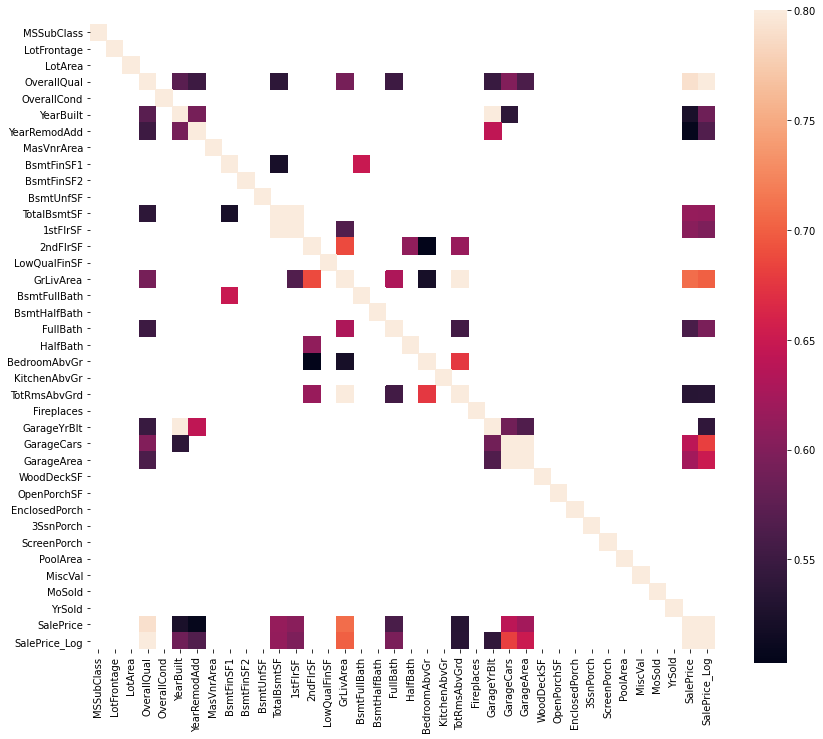

In [63]:
fig, ax = plt.subplots(figsize = (14, 12))
correlation = numeric_features.corr()
correlation = correlation[correlation > 0.5] #moderate to strong correlation 
sns.heatmap(correlation, square=True, vmax=0.8)

From the heatmap above we can see that there are 11 features that are moderately or strongly correlated with out log target variable, SalePrice_Log

These 11 features will be used as numerical features for future feature processing

In [71]:
good_numeric_corr = np.array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 
                         'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars','GarageArea', 'GarageYrBlt'])

<AxesSubplot:>

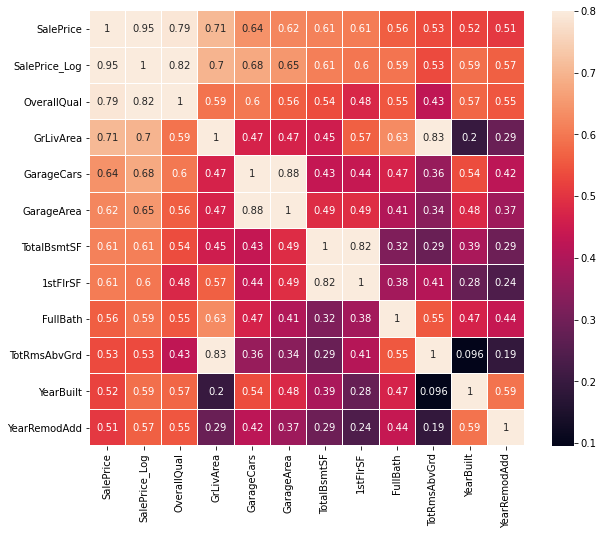

In [70]:
strong_corr = 13 #11 correlated feeatures + 2 SalePrice and SalePrice_Log
cols = correlation.nlargest(strong_corr, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot = True, xticklabels=cols.values, yticklabels=cols.values)

GarageCars and GarageArea are showing multicollinearity as they are correlated with each other

After selecting numerical features, let's listcategorical features and their unique values

In [73]:
for cat in list(categorical_feats):
  print(df[cat].value_counts())
  print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
###########################

Relation to SalePrice feature using boxplot

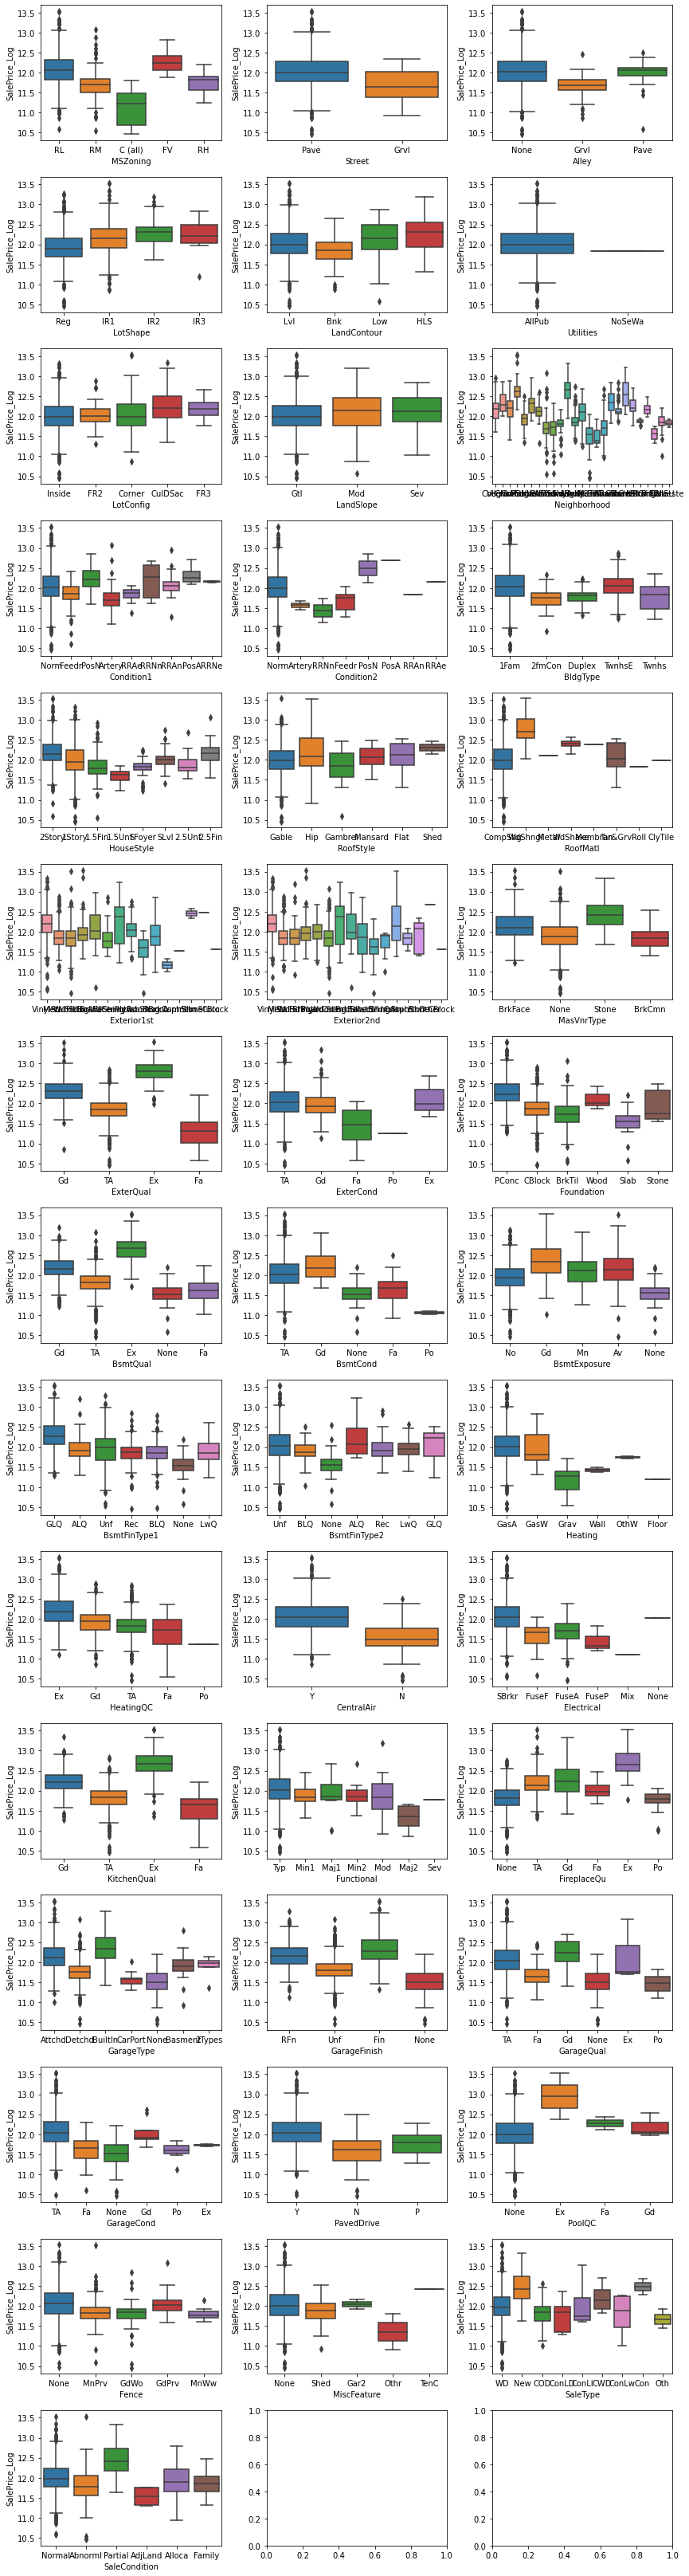

In [80]:
cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_feats):
            sns.boxplot(x=cat_feats[i], y = df['SalePrice_Log'], data = df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

In [91]:
good_categ_corr = np.array(['MSZoning', 'LandContour', 'Neighborhood', 'Condition2', 'BldgType', 'MasVnrType', 
                         'ExterQual', 'BsmtQual', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'PoolQC'])

#### Conclusions on first part:
We saw that for some numercial features like there is a strong linear correlation to the target. For other features like 'MSSubClass' the correlation is very weak.
For this kernel I decided to use only those features for prediction that have a correlation larger than a threshold value to SalePrice.
This threshold was chosen to be greater than 0.5.
For many of the categorical there is no strong relation to the target.
However, for some fetaures it is easy to find a strong relation.

### b) Use a “regular” train-test split with hyperparameter optimization using crossvalidation (i.e. GridSearchCV)

In [84]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1] #SalePrice_Log

In [86]:
#Splitting our dataset into train and test models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [87]:
from sklearn.model_selection import GridSearchCV

Below I will use three regularization methods: 
1. Ridge
2. Lasso
3. Elastic Net which is combination of both Ridge and Lasso

In [147]:
def get_best_score(grid):
    print("The best score is {:.2f}".format(grid.best_score_))    
    print("Best parameters", grid.best_params_)
    return grid.best_score_

#### 1. Ridge

In [163]:
from sklearn.linear_model import Ridge

ridge_parameters = {
    "preprocessing__num_columns__imputer__strategy": ["mean","median"],
    "model__alpha": [0.001, 0.005, 0.01, 0.1, 0.5, 1],
    "model__fit_intercept": [True,False],
}

ridge_model = Pipeline(steps = [
    ("preprocessing", ColumnTransformer(transformers = [
        ("num_columns",Pipeline(steps = [
            ('imputer',SimpleImputer()),
            ('scaler', StandardScaler())
        ]), good_numeric_corr),
        ("cat_columns", OneHotEncoder(handle_unknown='ignore'), good_categ_corr)])),
    ("model",Ridge())
])

In [165]:
grid_ridge = GridSearchCV(ridge_model, ridge_parameters, cv=5)

In [166]:
grid_ridge.fit(X_train, y_train)
sc_ridge = get_best_score(grid_ridge)

The best score is 0.82
Best parameters {'model__alpha': 1, 'model__fit_intercept': True, 'preprocessing__num_columns__imputer__strategy': 'mean'}


#### 2. Lasso

In [189]:
from sklearn.linear_model import Lasso

parameters = {
    "preprocessing__num_columns__imputer__strategy": ["mean","median"],
    "model__alpha": [0.001, 0.005, 0.01, 0.1, 0.5, 1], 
    "model__normalize": [True,False], 
    "model__tol": [1e-06,5e-06,1e-05,5e-05]
}

lasso_model = Pipeline(steps = [
    ("preprocessing", ColumnTransformer(transformers = [
        ("num_columns",Pipeline(steps = [
            ('imputer',SimpleImputer()),
            ('scaler', StandardScaler())
        ]), good_numeric_corr),
        ("cat_columns", OneHotEncoder(handle_unknown='ignore'), good_categ_corr)])),
    ("model", Lasso())
])

In [190]:
grid_lasso = GridSearchCV(lasso_model, parameters, cv=5)

In [191]:
grid_lasso.fit(X_train, y_train)
sc_lasso = get_best_score(grid_lasso)

The best score is 0.82
Best parameters {'model__alpha': 0.001, 'model__normalize': False, 'model__tol': 5e-05, 'preprocessing__num_columns__imputer__strategy': 'mean'}


#### 3. Elastic Net

In [192]:
from sklearn.linear_model import ElasticNet

elastic_model = Pipeline(steps = [
    ("preprocessing", ColumnTransformer(transformers = [
        ("num_columns",Pipeline(steps = [
            ('imputer',SimpleImputer()),
            ('scaler', StandardScaler())
        ]), good_numeric_corr),
        ("cat_columns", OneHotEncoder(handle_unknown='ignore'), good_categ_corr)])),
    ("model", ElasticNet())
])

In [193]:
grid_elastic = GridSearchCV(elastic_model, parameters, cv=5)

In [194]:
grid_elastic.fit(X_train, y_train)
sc_elastic = get_best_score(grid_elastic)

The best score is 0.83
Best parameters {'model__alpha': 0.001, 'model__normalize': False, 'model__tol': 5e-05, 'preprocessing__num_columns__imputer__strategy': 'mean'}


I want to write down a few conclusions. Ridge model did not need tolerance parameter, however, other two(Lasso and Elastic Net) kept giving me error on not recognizing the tolerance for the model. So, I wrote two parameter dictionaries for them. 
As we can see below, out best accuracy for model is 0.83 with Elastic Net. So, I will use its best parameters if the errors are negligible.

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of model on training set is",np.sqrt(mean_squared_error(y_train, grid_elastic.predict(X_train))).round(3))
print("MAE of model on training set is",mean_absolute_error(y_train, grid_elastic.predict(X_train)).round(3))
print("#"*50)
print("RMSE of model on test set is", np.sqrt(mean_squared_error(y_test, grid_elastic.predict(X_test))).round(3))
print("MAE of model on test set is", mean_absolute_error(y_test, grid_elastic.predict(X_test)).round(3))

RMSE of model on training set is 0.139
MAE of model on training set is 0.096
##################################################
RMSE of model on test set is 0.134
MAE of model on test set is 0.099


As we can see our model shows good result on both test and train dataset. RMSE of model in test set is only 0.134. So, we can use the best parameters to train our model

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

elastic_model = Pipeline(steps = [
    ("preprocessing", ColumnTransformer(transformers = [
        ("num_columns",Pipeline(steps = [
            ('imputer',SimpleImputer(strategy = 'mean')),
            ('scaler', StandardScaler())
        ]), good_numeric_corr),
        ("cat_columns", OneHotEncoder(handle_unknown='ignore'), good_categ_corr)])),
    ("model", ElasticNet(alpha = 0.001, normalize = False, tol = 5e-05))
])
elastic_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_columns',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'GarageYrBlt'], dtype='<U12')),
                                                 ('cat_columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  array(['MSZoning', 'LandContour', 'Neighborhood', 'Condition2',
       'BldgType', 'MasVnrType', 'ExterQual', 'BsmtQual', 'Ce